<font size='6'><b> Demo of advanced trianglechain functionality </b></font>

# setup

In [1]:
import sys, os, h5py, bz2, pylab as plt, importlib, seaborn, yaml, numpy as np, pickle, h5py
%pylab inline
%reload_ext autoreload
%autoreload 2
sys.path.append('../trianglechain/')

Populating the interactive namespace from numpy and matplotlib


/home/sfischba/.local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# generate some data

In [2]:
def get_samples(n_samples=10000, n_dims=4):
    covmat = np.random.normal(size=(n_dims, n_dims))
    covmat = np.dot(covmat.T,covmat)
    mean = np.random.uniform(size=(n_dims))
    samples = np.random.multivariate_normal(mean=mean, cov=covmat, size=(n_samples))
    from TriangleChain import ensure_rec
    samples = ensure_rec(samples, column_prefix='col')
    return samples

get data

In [3]:
n_dims = 6
samples1 = get_samples(n_samples=20000, n_dims=n_dims)
samples2 = get_samples(n_samples=20000, n_dims=n_dims)

get ranges for the plot

In [4]:
ranges = {f'col{i}': [-10,10] for i in range(n_dims)}

# contour plot with groups

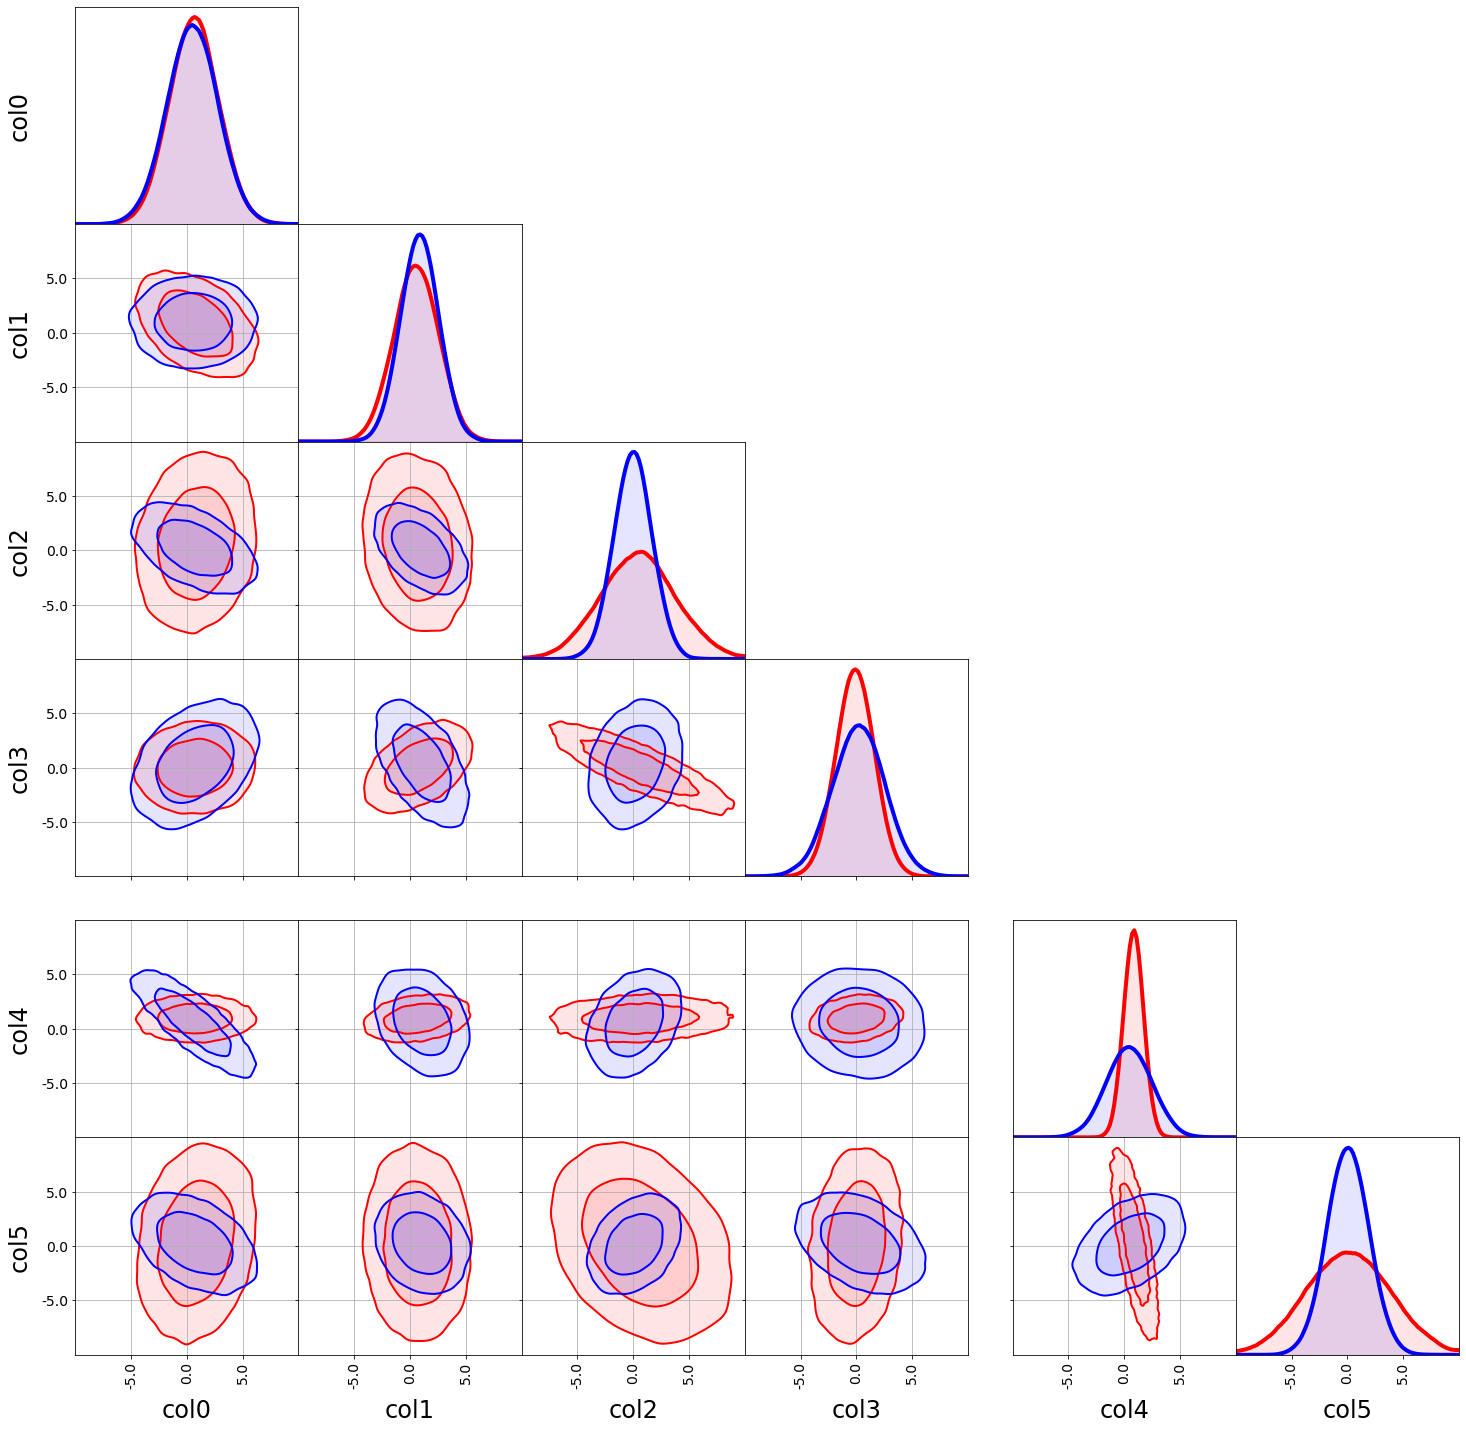

In [5]:
kwargs = {'n_ticks': 3, #number of ticks that are used
          'de_kwargs': {'smoothing_parameter': 0.3}, #how much the contours are smoothed, Default 0.1
          'grouping_kwargs': {'n_per_group': (4,2), #how to group parameters
                              'empty_ratio': 0.2}, #space between groups
          'fill': True,
          'grid': True
         }

from TriangleChain import TriangleChain
tri = TriangleChain(density_estimation_method='smoothing', n_bins=100, ranges=ranges, **kwargs)
tri.contour_cl(samples1, color='r');
tri.contour_cl(samples2, color='b');

# contour plot with different parameter

In [6]:
samples1 = get_samples(n_samples=20000, n_dims=3)
samples2 = get_samples(n_samples=20000, n_dims=2)

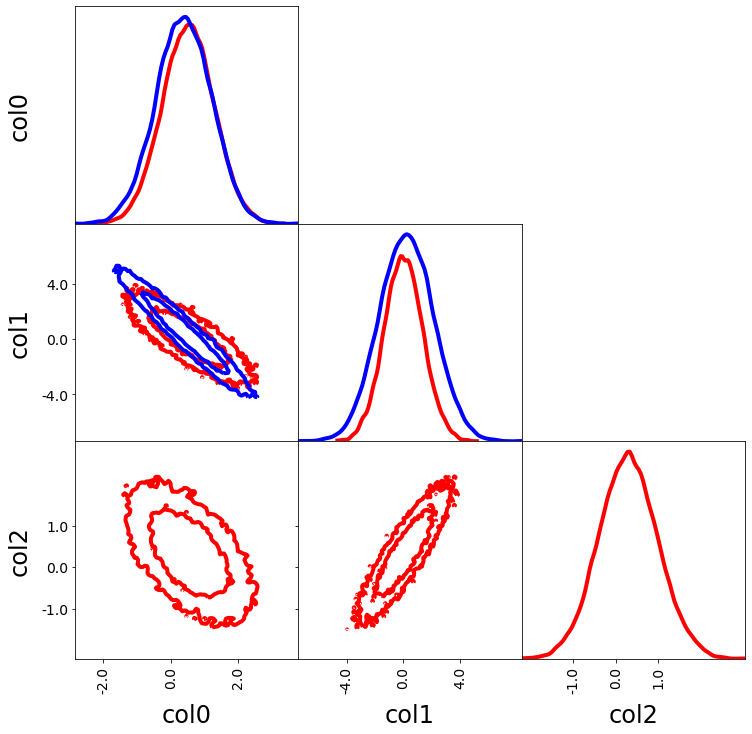

In [7]:
from TriangleChain import TriangleChain
tri = TriangleChain()
tri.contour_cl(samples1, color='r');
tri2 = TriangleChain(fig=tri.fig, add_empty_plots_like = samples1)
tri2.contour_cl(samples2, color='b');

# density image with alpha plot

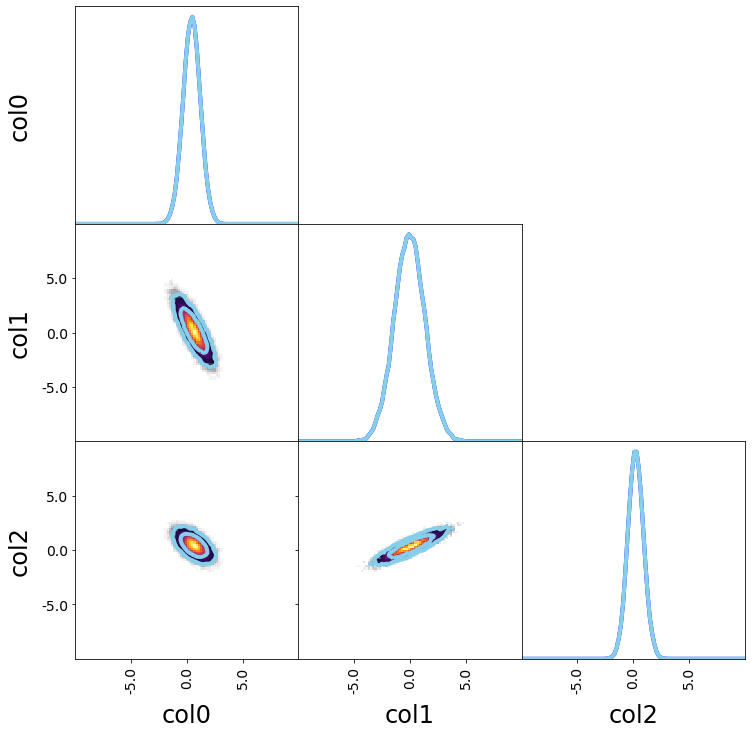

In [8]:
from TriangleChain import TriangleChain
kwargs = {'alpha_for_low_density': True, #set low density values to alpha
          'alpha_threshold': 0.1} # how much of the cmap should be used for the transition to alpha
tri = TriangleChain(density_estimation_method='smoothing', n_bins=100, ranges=ranges, **kwargs)
tri.density_image(samples1, cmap=plt.cm.inferno);
tri.contour_cl(samples1, color='skyblue');